In [1]:
from google.colab import drive
drive.mount('/content/drive',force_remount = True)

Mounted at /content/drive


In [2]:
from __future__ import division, print_function, absolute_import
print('Importing libraries...')
import pickle
#import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import tensorflow as tf
from PIL import Image
from skimage import transform #For downsizing images
from sklearn.model_selection import train_test_split

Importing libraries...


## Data Processing

In [3]:
# Creating features dataset
# unpickling the image files
with open ('/content/drive/MyDrive/population density satellite data/dataX', 'rb') as fp:
    dataX = pickle.load(fp)
print('Features dataset finished with shape', dataX.shape)


Features dataset finished with shape (7000, 200, 200, 3)


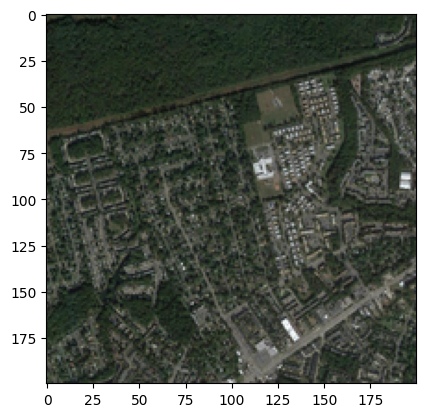

In [4]:
import cv2
import matplotlib.pyplot as plt
temp = cv2.cvtColor(dataX[465], cv2.COLOR_BGR2RGB)
plt.imshow(temp)
#plt.imshow(imageio.imread('./images/0_0.png'))
plt.show()

In [5]:
# unpickling labels file
with open ('/content/drive/MyDrive/population density satellite data/dataY', 'rb') as fp:
    dataY = pickle.load(fp)
print('Labels dataset finished with shape', dataY.shape)

Labels dataset finished with shape (7000,)


In [6]:
print(dataY[465])

2604.789675


In [7]:
X_train = []
X_test = []
Y_train = []
Y_test = []

In [8]:
dataX.shape[0]

7000

In [9]:
for n in range(dataX.shape[0]):
    if not n%10:
        X_train.append(dataX[n])
        X_train.append(dataX[n+1])
        X_train.append(dataX[n+2])
        X_train.append(dataX[n+3])
        X_train.append(dataX[n+4])
        X_train.append(dataX[n+5])
        X_train.append(dataX[n+6])
        X_train.append(dataX[n+7])
        X_test.append(dataX[n+8])
        X_test.append(dataX[n+9])

        Y_train.append(dataY[n])
        Y_train.append(dataY[n+1])
        Y_train.append(dataY[n+2])
        Y_train.append(dataY[n+3])
        Y_train.append(dataY[n+4])
        Y_train.append(dataY[n+5])
        Y_train.append(dataY[n+6])
        Y_train.append(dataY[n+7])
        Y_test.append(dataY[n+8])
        Y_test.append(dataY[n+9])

In [10]:
X_train = np.array(X_train)
X_test = np.array(X_test)
Y_train = np.array(Y_train)
Y_test = np.array(Y_test)

print(X_train.shape, X_test.shape, Y_train.shape, Y_test.shape)

(5600, 200, 200, 3) (1400, 200, 200, 3) (5600,) (1400,)


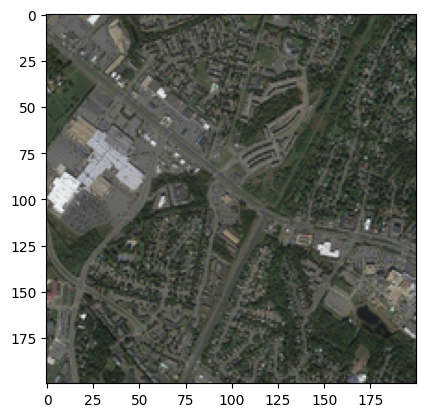

In [11]:
temp = cv2.cvtColor(X_train[465], cv2.COLOR_BGR2RGB)
plt.imshow(temp)
#plt.imshow(imageio.imread('./images/0_0.png'))
plt.show()

In [12]:
Y_train[465]

1616.95885

In [13]:
def classify(t):
    i = 0
    for n in t:
        if (n<1):
            t[i] = 0
            i+=1
        if (1<=n) and (n<10):
            t[i] = 1
            i+=1
        if (10<=n) and (n<50):
            t[i] = 2
            i+=1
        if (50<=n) and (n<100):
            t[i] = 3
            i+=1
        if (100<=n) and (n<500):
            t[i] = 4
            i+=1
        if (500<=n) and (n<1000):
            t[i] = 5
            i+=1
        if (1000<=n) and (n<2000):
            t[i] = 6
            i+=1
        if (2000<=n):
            t[i] = 7
            i+=1
    return t

In [14]:
Y_train = classify(Y_train)
Y_test = classify(Y_test)

In [15]:
Y_train[465]

6.0

In [16]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.applications import VGG16
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense, Dropout
from tensorflow.keras.utils import to_categorical

In [17]:
# Convert labels to one-hot encoding
Y_train = to_categorical(Y_train - 1, num_classes=8)
Y_test = to_categorical(Y_test - 1, num_classes=8)

In [18]:
Y_train[465]

array([0., 0., 0., 0., 0., 1., 0., 0.], dtype=float32)

## Model Training

In [19]:
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(200, 200, 3))

58889256/58889256 [==============================] - 0s 0us/step


In [20]:
for layer in base_model.layers:
    layer.trainable = False

In [21]:
# Create a new model
model = Sequential()
model.add(base_model)
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(8, activation='softmax'))

In [22]:
# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
#train model
history = model.fit(X_train, Y_train, epochs=40, batch_size=32, validation_data=(X_test, Y_test))

Epoch 1/40
175/175 [==============================] - 39s 147ms/step - loss: 3.2447 - accuracy: 0.4020 - val_loss: 1.3945 - val_accuracy: 0.4786
Epoch 2/40
175/175 [==============================] - 23s 129ms/step - loss: 1.4138 - accuracy: 0.4805 - val_loss: 1.3456 - val_accuracy: 0.4957
Epoch 3/40
175/175 [==============================] - 24s 135ms/step - loss: 1.3250 - accuracy: 0.5011 - val_loss: 1.2920 - val_accuracy: 0.4964
Epoch 4/40
175/175 [==============================] - 24s 137ms/step - loss: 1.2632 - accuracy: 0.5018 - val_loss: 1.2558 - val_accuracy: 0.5243
Epoch 5/40
175/175 [==============================] - 24s 139ms/step - loss: 1.1849 - accuracy: 0.5296 - val_loss: 1.1697 - val_accuracy: 0.5386
Epoch 6/40
175/175 [==============================] - 24s 139ms/step - loss: 1.1335 - accuracy: 0.5537 - val_loss: 1.2112 - val_accuracy: 0.5336
Epoch 7/40
175/175 [==============================] - 24s 138ms/step - loss: 1.0821 - accuracy: 0.5630 - val_loss: 1.2154 - val_ac

## Model Evaluation

In [23]:
import numpy as np
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt


In [24]:
model = tf.keras.models.load_model('/content/drive/MyDrive/population density satellite data/vgg16')

44/44 [==============================] - 7s 163ms/step


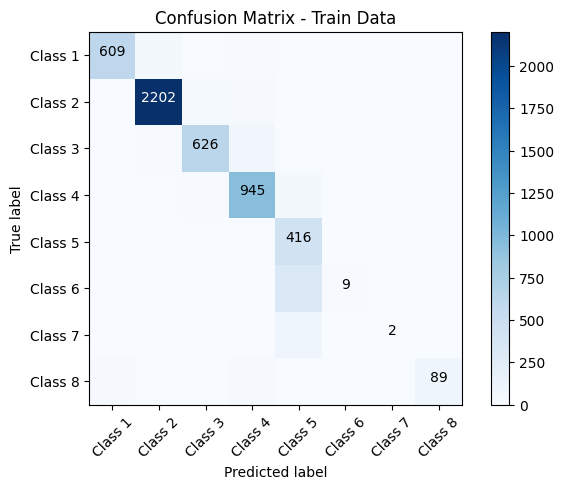

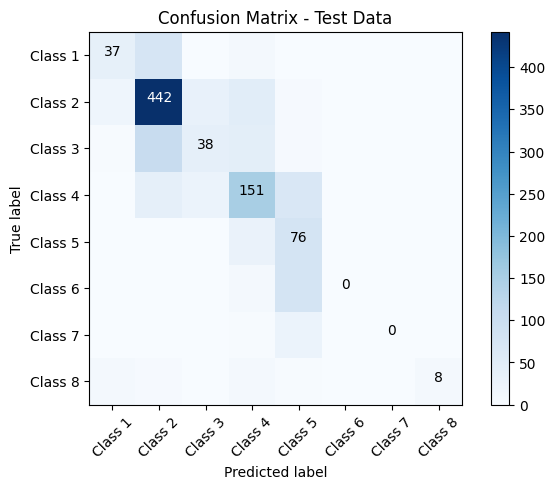

In [25]:
# Assuming you have already trained the model and obtained predictions for X_train and X_test
# train_predictions and test_predictions contain the predicted values for train and test data respectively

# train_predictions and test_predictions should contain the predicted labels/classes
train_predictions = model.predict(X_train)
test_predictions = model.predict(X_test)

# Assuming the labels are in the correct format and need conversion to class labels
train_predicted_classes = np.argmax(train_predictions, axis=1)
test_predicted_classes = np.argmax(test_predictions, axis=1)

# Assuming Y_train and Y_test are the true labels in the correct format
# Convert one-hot encoded labels back to categorical labels
train_true_classes = np.argmax(Y_train, axis=1)
test_true_classes = np.argmax(Y_test, axis=1)

# Create confusion matrices for both train and test data
train_confusion_matrix = confusion_matrix(train_true_classes, train_predicted_classes)
test_confusion_matrix = confusion_matrix(test_true_classes, test_predicted_classes)

# Function to plot confusion matrix
def plot_confusion_matrix(cm, classes, title, cmap=plt.cm.Blues):
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = 'd'
    thresh = cm.max() / 2.
    for i, j in zip(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt), horizontalalignment="center", color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

# Define the class names or labels for your problem
class_names = ['Class 1', 'Class 2', 'Class 3', 'Class 4', 'Class 5', 'Class 6', 'Class 7', 'Class 8']

# Plot the confusion matrix for train data
plt.figure()
plot_confusion_matrix(train_confusion_matrix, classes=class_names, title='Confusion Matrix - Train Data')

# Plot the confusion matrix for test data
plt.figure()
plot_confusion_matrix(test_confusion_matrix, classes=class_names, title='Confusion Matrix - Test Data')

plt.show()
# Train Accuracy: 0.87
# Test Accuracy: 0.5371
